In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc


In [2]:
# path 
data_dict_path = 'data-dictionary.csv'
country_path = 'Country-data.csv'


In [3]:
# read csv files
dict_df = pd.read_csv(data_dict_path)
df = pd.read_csv(country_path)


In [4]:
dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [6]:
dict_df.isnull().sum()


Column Name    0
Description    0
dtype: int64

In [7]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
df.shape

(167, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
df['country'].nunique()


167

In [12]:
#drop country column
data=df.drop(['country'],axis=1)

In [13]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<Axes: >

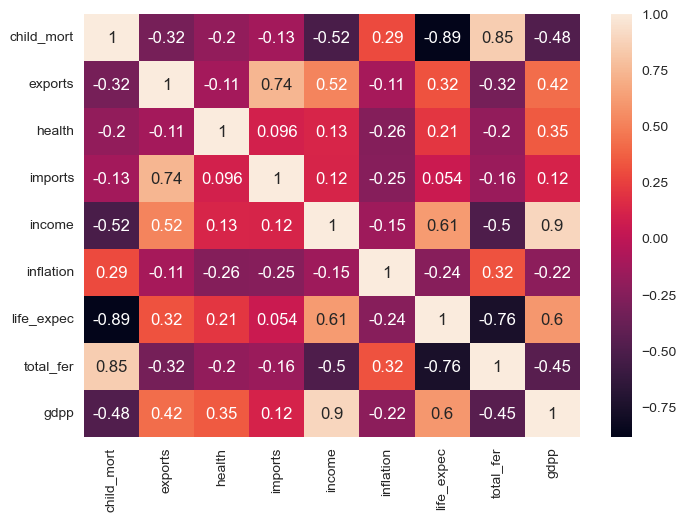

In [14]:
#correlation 
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

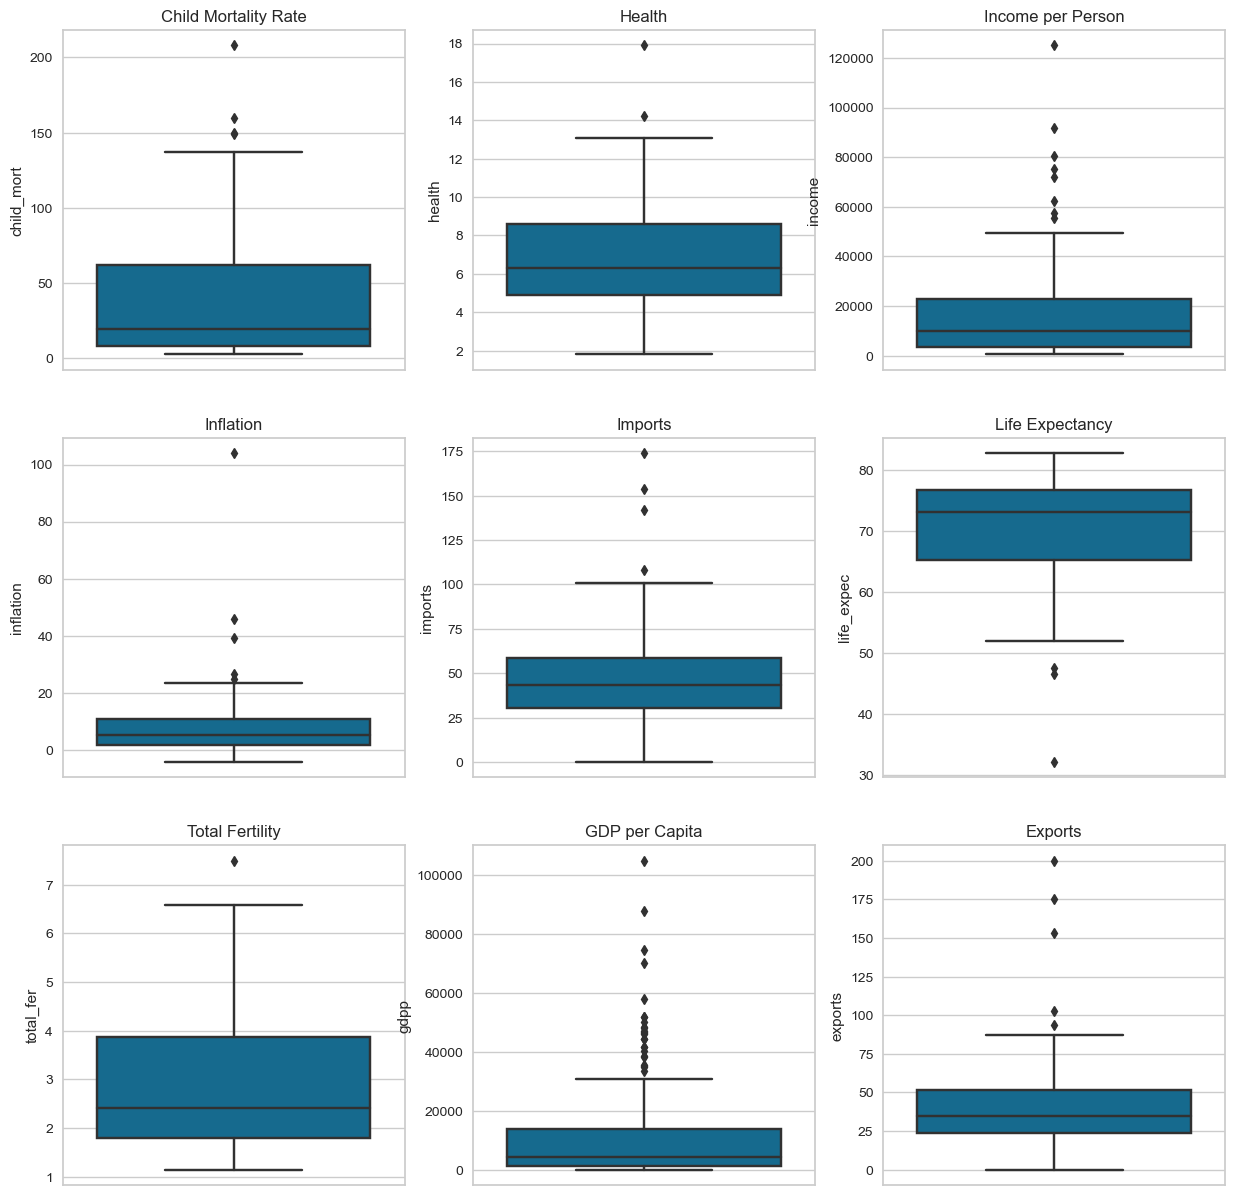

In [15]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


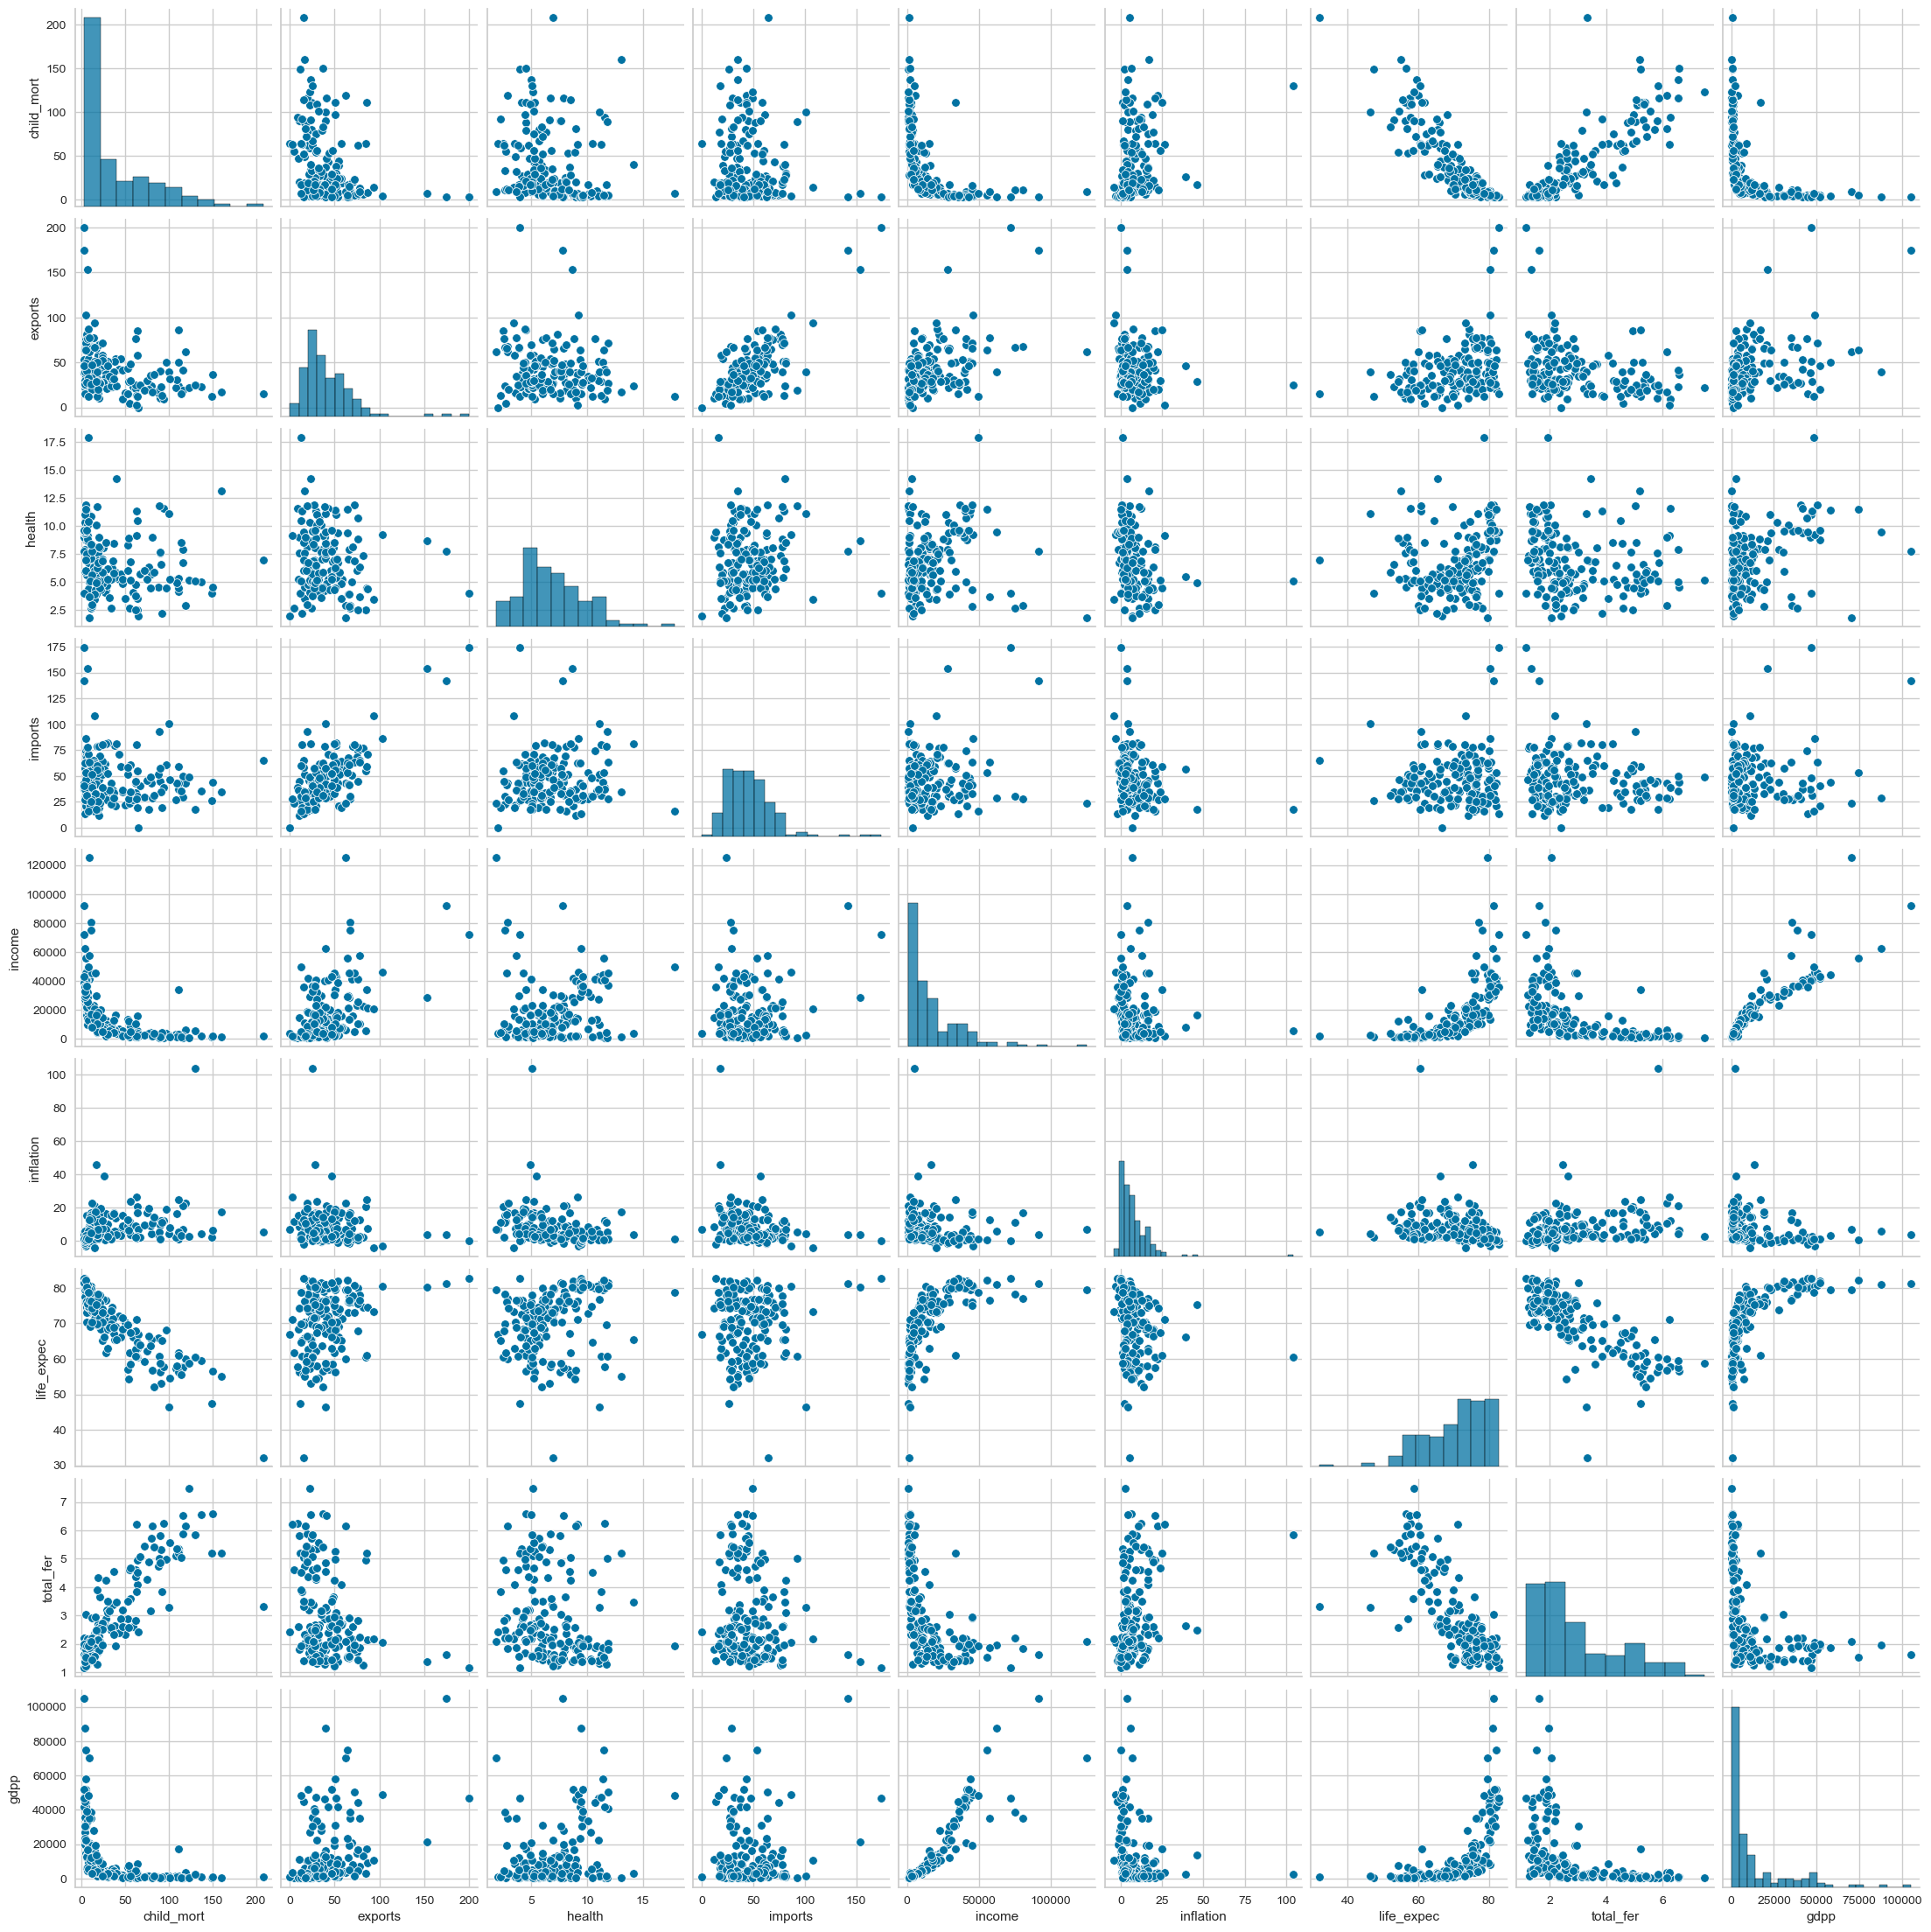

In [16]:
sns.pairplot(df)


In [17]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [18]:
scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [19]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# princt scaled dataset
scaled_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K-Means Clustering
K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

First we initialize k points called means randomly
Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
We repeat the process for a given number of iteartions and at the end,we have our clusters
To decide how many number of clusters consider we are going to use a most popular elbow method

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

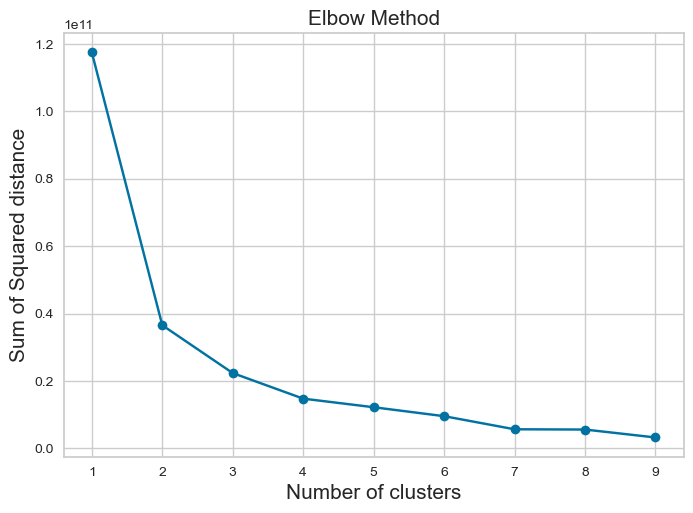

In [20]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [21]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=111)

In [22]:
pd.Series(kmeans.labels_).value_counts()


0    84
1    47
2    36
Name: count, dtype: int64

In [23]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

In [24]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
cluster_labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [26]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [27]:
kmeans_df.to_csv('kmeans_result.csv',index=False)


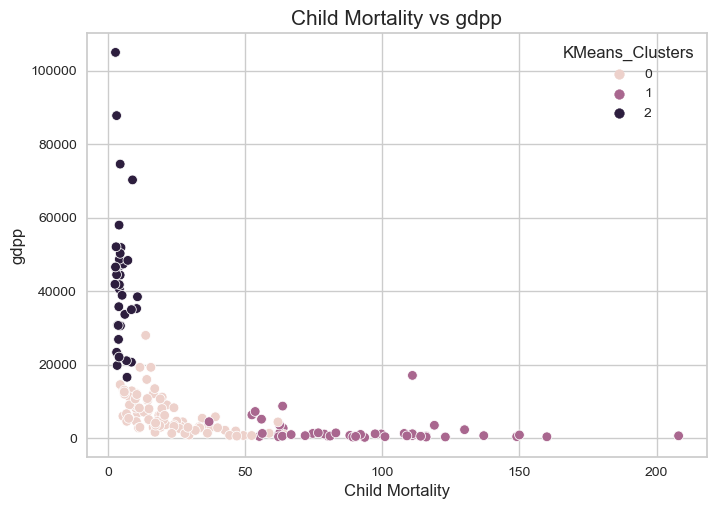

In [28]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x=kmeans_df['child_mort'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

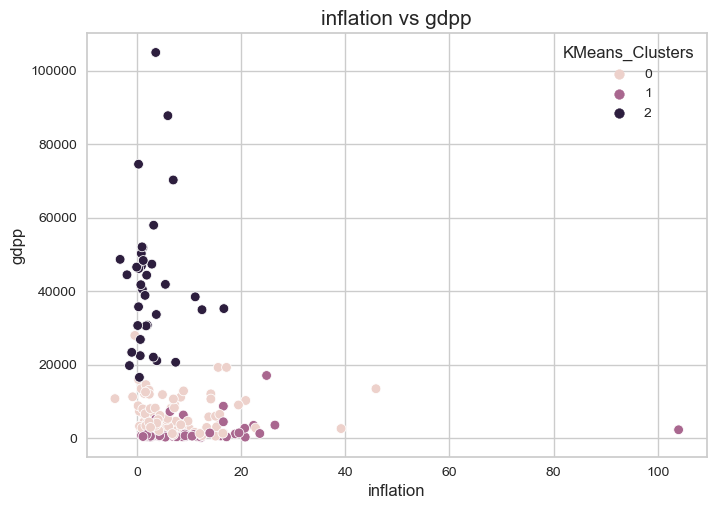

In [29]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(x=kmeans_df['inflation'],y=kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that

Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country
Country having low child-mortality, high gdpp and high infaltion is the developed country
So here we conclude that
0 = under-developing country
1 = developing country
2 = developed country

In [30]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 84
Number of developing countries 47
Number of under-developing countries 36


In [31]:
list(developed)


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [32]:
list(developing)


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [33]:
list(under_developing)


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

# Hierarchical Clustering
Also called Hierarchical cluster analysis or HCA is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom. This clustering technique is divided into two types:

## Agglomerative Hierarchical Clustering
Divisive Hierarchical Clustering
Agglomerative Hierarchical Clustering
The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). It's a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

## Dendogram
A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data

# Hierarchical Clustering

From above dendogram we can take minimum no of clusters as 2 and maximum number of cluster as 5.As we can see from dendogram 3 in the the right no of clusters ,so we are going to take 3 no of clusters


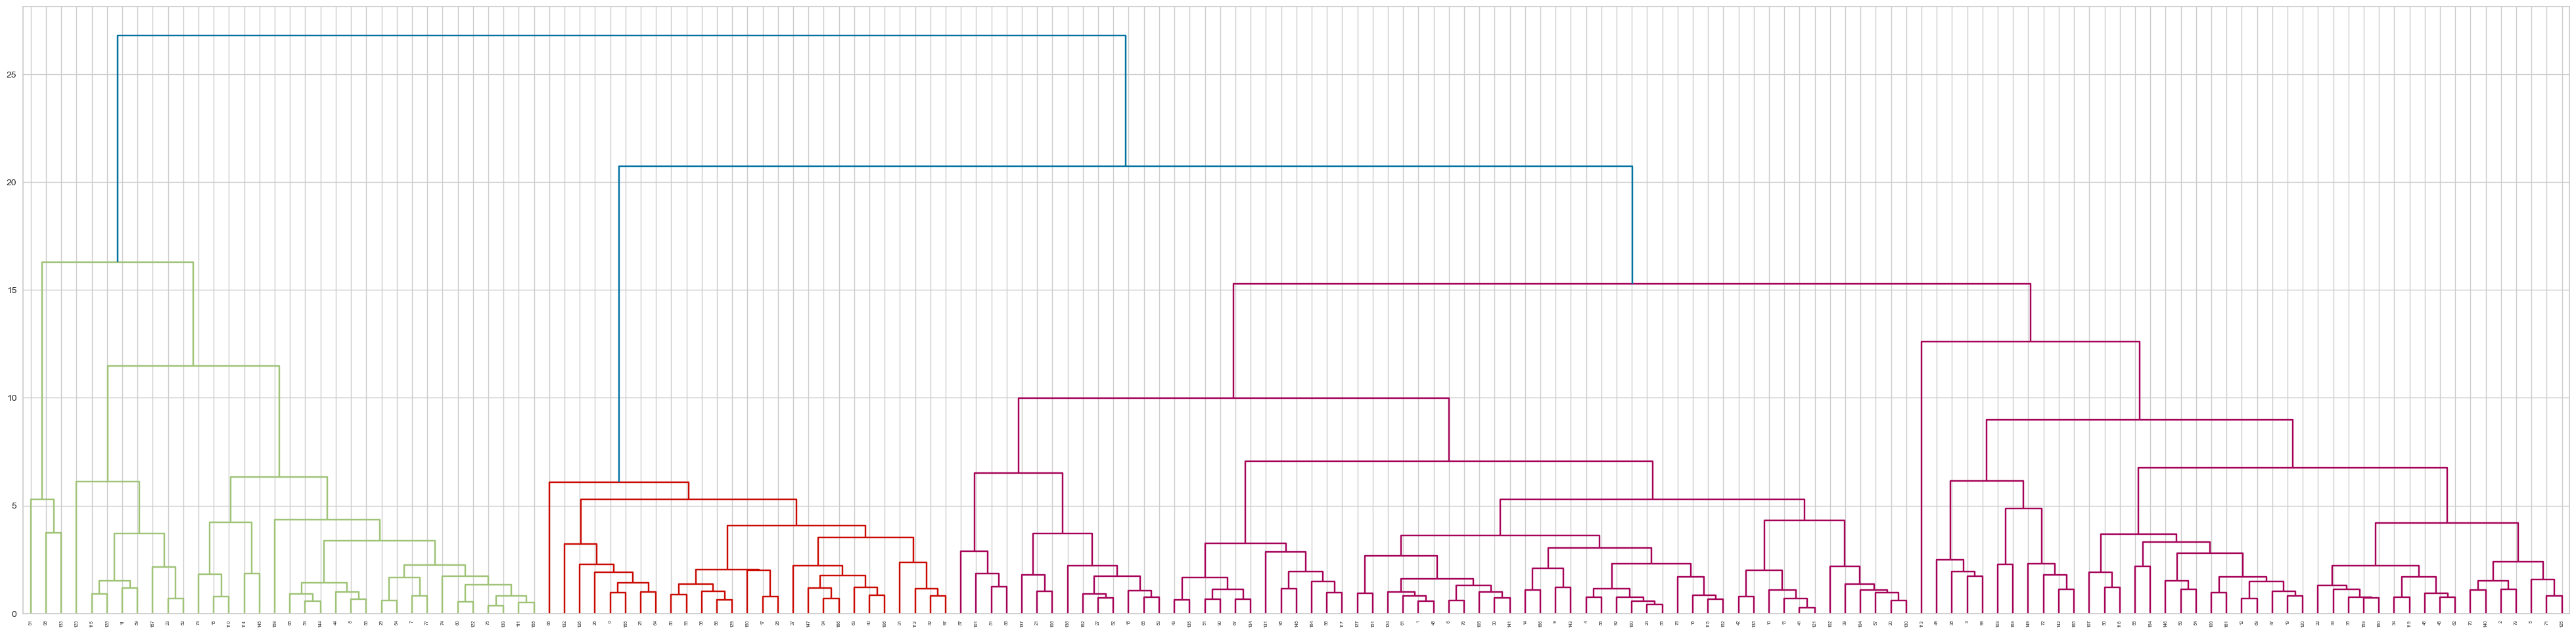

In [34]:
#plotting dendogram
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))

In [35]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [36]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


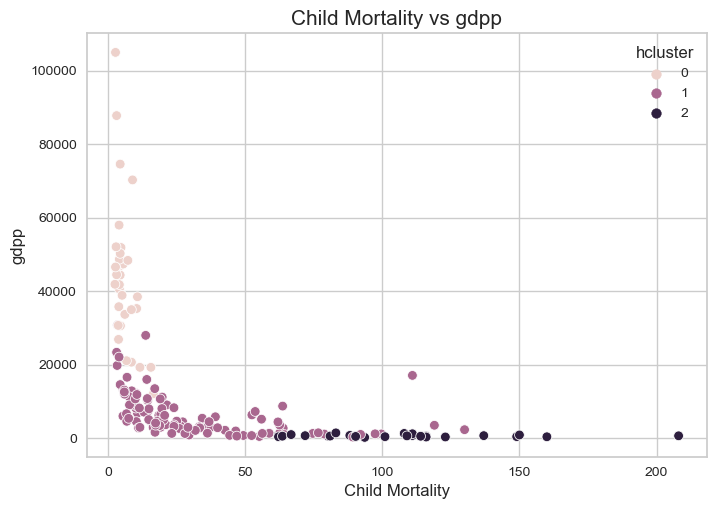

In [37]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x=hcluster_df['child_mort'],y=hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

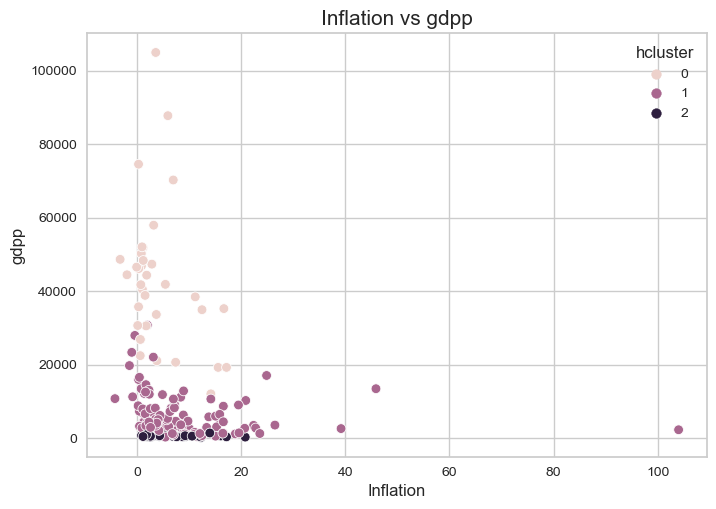

In [38]:
#visulazing hcluster results
sns.scatterplot(x=hcluster_df['inflation'],y=hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

In [39]:
#find number of developed country,developing country,under-developed country
developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==1]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of deveoped countries 34
Number of developing countries 106
Number of under-developing countries 27
